In [1]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
X_dict = [{'interest': 'tech', 'occupation': 'professional'},
    {'interest': 'fashion', 'occupation': 'student'},
    {'interest': 'fashion','occupation':'professional'},
    {'interest': 'sports', 'occupation': 'student'},
    {'interest': 'tech', 'occupation': 'student'},
    {'interest': 'tech', 'occupation': 'retired'},
    {'interest': 'sports','occupation': 'professional'}]

In [3]:
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_encoded = dict_one_hot_encoder.fit_transform(X_dict)
print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [4]:
dict_one_hot_encoder.vocabulary_

{'interest=tech': 2,
 'occupation=professional': 3,
 'interest=fashion': 0,
 'occupation=student': 5,
 'interest=sports': 1,
 'occupation=retired': 4}

In [6]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 1. 0. 0. 1. 0.]]


In [7]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))

[{'interest=sports': 1.0, 'occupation=retired': 1.0}]


In [9]:
new_dict = [{'interest': 'unknown_interest', 'occupation': 'retired'},
            {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [10]:
import pandas as pd
df = pd.DataFrame({'score': ['low', 'high', 'medium', 'medium', 'low']})
print(df)

    score
0     low
1    high
2  medium
3  medium
4     low


In [11]:
mapping = {'low': 1, 'medium': 2, 'high': 3}
df['score'] = df['score'].replace(mapping)
df

,score
0,1
1,3
2,2
3,2
4,1


In [12]:
import numpy as np
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

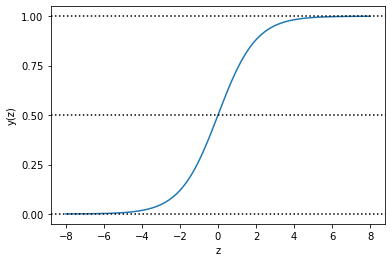

In [13]:
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
import matplotlib.pyplot as plt
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

<ipython-input-15-138e937b3e2e>:2: RuntimeWarning: divide by zero encountered in log
  cost = -np.log(y_hat)


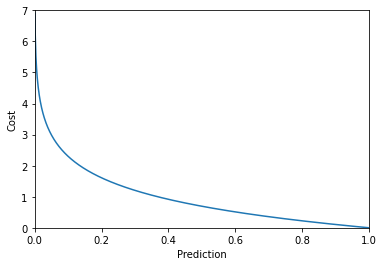

In [15]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

<ipython-input-16-05d0ffbaa753>:2: RuntimeWarning: divide by zero encountered in log
  cost = -np.log(1 - y_hat)


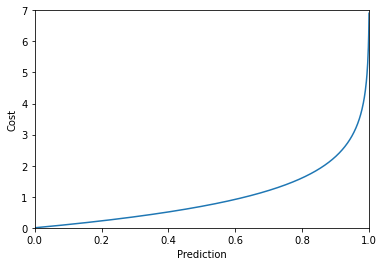

In [16]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(1 - y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

In [17]:
def compute_prediction(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

In [18]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

In [19]:
def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1-predictions))
    return cost

In [20]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [21]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

In [23]:
X_train = np.array([[6,7], [2, 4], [3, 6], [4, 7], [1, 6], [5, 2], [2, 0], [6, 3], [4, 1], [7, 2]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
weights = train_logistic_regression(X_train, y_train, max_iter=1000, learning_rate=0.1, fit_intercept=True)

0.5744042371657099
0.034460223392510314
0.018265572708476157
0.012493458388041109
0.00951532913854744
0.007693388060646923
0.0064620943335143306
0.0055735118468322594
0.004901632254525041
0.004375567740665121


In [24]:
X_test = np.array([[6, 1], [1, 3], [3, 1], [4, 5]])
predictions = predict(X_test, weights)
predictions

array([0.9999478 , 0.00743991, 0.9808652 , 0.02080847])

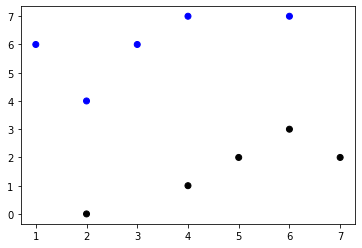

In [25]:
plt.scatter(X_train[:,0], X_train[:,1], c=['b']*5+['k']*5, marker='o')

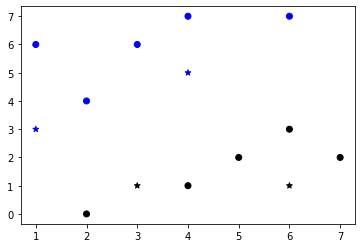

In [28]:
colors = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_train[:,0], X_train[:,1], c=['b']*5+['k']*5, marker='o')
plt.scatter(X_test[:,0], X_test[:,1], marker='*', c=colors)
plt.show()

In [31]:
import pandas as pd
n_rows = 300000
df = pd.read_csv("train.csv", nrows=n_rows)
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

In [32]:
n_train = 10000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)

In [34]:
import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_enc.toarray(), Y_train, max_iter=1000, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

0.6820019456743648
0.4608619713011896
0.4503715555130051
0.4455503890097847
0.4420611414384596
0.4393702812833892
0.437228041454526
0.4354781787758496
0.43401801289720104
0.4327779028622343
--- 17.711s seconds ---


In [35]:
pred = predict(X_test_enc.toarray(), weights)
from sklearn.metrics import roc_auc_score
print('Training samples: {0}, AUC on testing set: {1:.3f}'.format(n_train, roc_auc_score(Y_test, pred)))

Training samples: 10000, AUC on testing set: 0.680


In [36]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights

In [37]:
def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [38]:
start_time = timeit.default_timer()
weights = train_logistic_regression_sgd(X_train_enc.toarray(), Y_train, max_iter=10, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

0.41496547913327814
0.4060071128286624
0.40104937451793143
0.397355285305202
0.3943631638289113
--- 1.747s seconds ---


In [39]:
pred = predict(X_test_enc.toarray(), weights)
print('Training samples: {0}, AUC on testing set: {1:.3f}'.format(n_train, roc_auc_score(Y_test, pred)))

Training samples: 10000, AUC on testing set: 0.713


In [45]:
from sklearn.linear_model import SGDClassifier
sgd_lr = SGDClassifier(loss='log', penalty=None, fit_intercept=True, max_iter=1000, learning_rate='constant', eta0=0.01)

In [46]:
sgd_lr.fit(X_train_enc.toarray(), Y_train)
pred = sgd_lr.predict_proba(X_test_enc.toarray())[:,1]
print('Training samples: {0}, AUC on testing set: {1:.3f}'.format(n_train, roc_auc_score(Y_test, pred)))

Training samples: 10000, AUC on testing set: 0.710


In [47]:
sgd_lr_11 = SGDClassifier(loss='log', penalty='l1', alpha=0.0001, fit_intercept=True, max_iter=100, learning_rate='constant', eta0=0.01)
sgd_lr_11.fit(X_train_enc.toarray(), Y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log', max_iter=100,
              penalty='l1')

In [48]:
coef_abs = np.abs(sgd_lr_11.coef_)
print(coef_abs)

[[0.         0.         0.21912965 ... 0.26969809 0.06223365 0.07690748]]


In [49]:
print(np.sort(coef_abs)[0][:10])
bottom_10 = np.argsort(coef_abs)[0][:10]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
feature_names = enc.get_feature_names()
print('10 least important features are: \n', feature_names[bottom_10])

10 least important features are: 
 ['x0_1001' 'x8_9735f427' 'x8_977a2929' 'x8_97868ca6' 'x8_9801dcd7'
 'x8_981edffc' 'x8_9868c918' 'x8_987b276c' 'x8_99115329' 'x8_9955990f']


In [51]:
print(np.sort(coef_abs)[0][-10:])

[0.70366861 0.74974655 0.75815151 0.83188022 0.84364051 0.85686022
 0.88554766 0.91527333 0.91826289 0.92104587]


In [52]:
top_10 = np.argsort(coef_abs)[0][-10:]
print("10 most important features are: \n", feature_names[top_10])

10 most important features are: 
 ['x2_5ee41ff2' 'x18_15' 'x7_cef3e649' 'x5_9c13b419' 'x18_61' 'x17_100048'
 'x2_d9750ee7' 'x8_81b42528' 'x5_1779deee' 'x3_27e3c518']


In [53]:
n_rows = 100000 * 11
df = pd.read_csv("train.csv", nrows=n_rows)
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

n_train = 100000 * 10
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

In [54]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)

OneHotEncoder(handle_unknown='ignore')

In [55]:
sgd_lr_online = SGDClassifier(loss='log', penalty=None, fit_intercept=True, max_iter=1, learning_rate='constant', eta0=0.01)

In [56]:
start_time = timeit.default_timer()
for i in range(10):
    x_train = X_train[i*100000:(i+1)*100000]
    y_train = Y_train[i*100000:(i+1)*100000]
    x_train_enc = enc.transform(x_train)
    sgd_lr_online.partial_fit(x_train_enc.toarray(), y_train, classes=[0,1])

In [57]:
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 75.799s seconds ---


In [58]:
x_test_enc = enc.transform(X_test)
pred = sgd_lr_online.predict_proba(x_test_enc.toarray())[:,1]
print('Training samples: {0}, AUC on testing set: {1:.3f}'.format(n_train * 10, roc_auc_score(Y_test, pred)))

Training samples: 10000000, AUC on testing set: 0.760


In [59]:
from sklearn import datasets
digits = datasets.load_digits()
n_samples = len(digits.images)

In [60]:
X = digits.images.reshape((n_samples, -1))
Y = digits.target

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l2', None],
              'alpha': [1e-07, 1e-06, 1e-05, 1e-04],
              'eta0': [0.01, 0.1, 1, 10]}
sgd_lr = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, fit_intercept=True, max_iter=100)
grid_search = GridSearchCV(sgd_lr, parameters, n_jobs=-1, cv=3)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=SGDClassifier(eta0=0.01, learning_rate='constant',
                                     loss='log', max_iter=100),
             n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001],
                         'eta0': [0.01, 0.1, 1, 10], 'penalty': ['l2', None]})

In [65]:
print(grid_search.best_params_)

{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l2'}


In [66]:
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test, Y_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy * 100))

The accuracy on testing set is: 94.2%


In [68]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=30, n_jobs=-1)

In [71]:
n_rows = 100000
df = pd.read_csv("train.csv", nrows=n_rows)
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

n_train = 10000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

In [72]:
random_forest.fit(X_train_enc.toarray() ,Y_train)

RandomForestClassifier(min_samples_split=30, n_jobs=-1)

In [73]:
feature_imp = random_forest.feature_importances_
print(feature_imp)

[0.00011438 0.00100968 0.00120767 ... 0.0006904  0.00129013 0.00892946]


In [74]:
feature_names = enc.get_feature_names()
print(np.sort(feature_imp)[:10])
bottom_10 = np.argsort(feature_imp)[:10]
print('10 least important features are: \n', feature_names[bottom_10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10 least important features are: 
 ['x11_20004' 'x8_0f5e1f05' 'x5_840bdbef' 'x17_100141' 'x8_8017db7f'
 'x8_0d3f0fea' 'x2_45e91bcc' 'x5_21d5ad38' 'x3_8933dbcb' 'x11_20215']


In [76]:
print(np.sort(feature_imp)[-10:])
top_10 = np.argsort(feature_imp)[-10:]
print('10 most important features are: \n', feature_names[top_10])

[0.00792627 0.00794206 0.00810491 0.00884247 0.00892946 0.00893517
 0.00926042 0.00950644 0.01201708 0.01494366]
10 most important features are: 
 ['x17_-1' 'x8_4ea23a13' 'x3_98572c79' 'x8_1f0bc64f' 'x18_157'
 'x8_d787e91b' 'x8_8a4875bd' 'x8_81b42528' 'x18_33' 'x15_2']
